## Data Pipeline Overview
EDA (Exploratory Data Analysis)
#1. Data Cleaning
#2 Handling Missing Values
#3 Target Separation
#4 Preprocessing (Scaling and Encoding)
#5 Modeling (SVM, Random Forest, MLP)
#6 Evaluation
#7 Testing

In [1]:
!pip install miceforest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.7 MB/s eta 0:00:00


In [2]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import miceforest as mf


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
df = pd.read_csv('Cleaned_HeartFailure_admissionss.csv')
# Step 1: Exploratory Data Analysis (EDA)
def eda(df):
    # Display basic information
    print(df.info())
    print(df.describe())
    print(df.isnull().sum())  # Missing values


In [4]:
 print(df.isnull().sum())

not_admitted_deceased            0
admitted_survived                0
admitted_deceased                0
age                              0
gender                           0
beta_blocker                     0
hf_status                       22
visit_type                      39
patient_type                     1
treatment_phase                 45
validated_bp_monitor           873
palpitations                    16
num_admissions_last_year       632
hf_type                          9
crackles                       196
device                         156
dizziness                       17
atrial_fibrillation              0
pacing                           0
sinus_rhythm                     0
iron_deficiency                423
ferinject                      883
lab                             22
lbbb                           871
lvef                            15
lvef_percentage                547
mra                              0
nvag                           193
nocturia            

In [5]:
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   not_admitted_deceased        985 non-null    int64  
 1   admitted_survived            985 non-null    int64  
 2   admitted_deceased            985 non-null    int64  
 3   age                          985 non-null    float64
 4   gender                       985 non-null    object 
 5   beta_blocker                 985 non-null    int64  
 6   hf_status                    963 non-null    object 
 7   visit_type                   946 non-null    object 
 8   patient_type                 984 non-null    object 
 9   treatment_phase              940 non-null    object 
 10  validated_bp_monitor         112 non-null    float64
 11  palpitations                 969 non-null    float64
 12  num_admissions_last_year     353 non-null    float64
 13  hf_type  

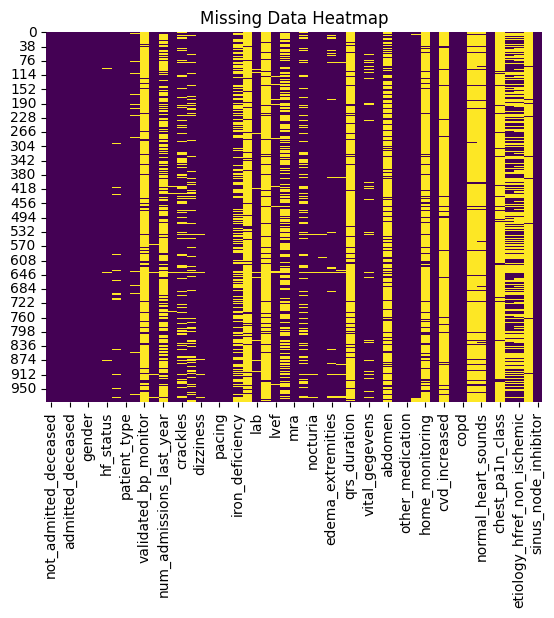

In [6]:
# EDA - Checking for missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data Heatmap')
plt.show()


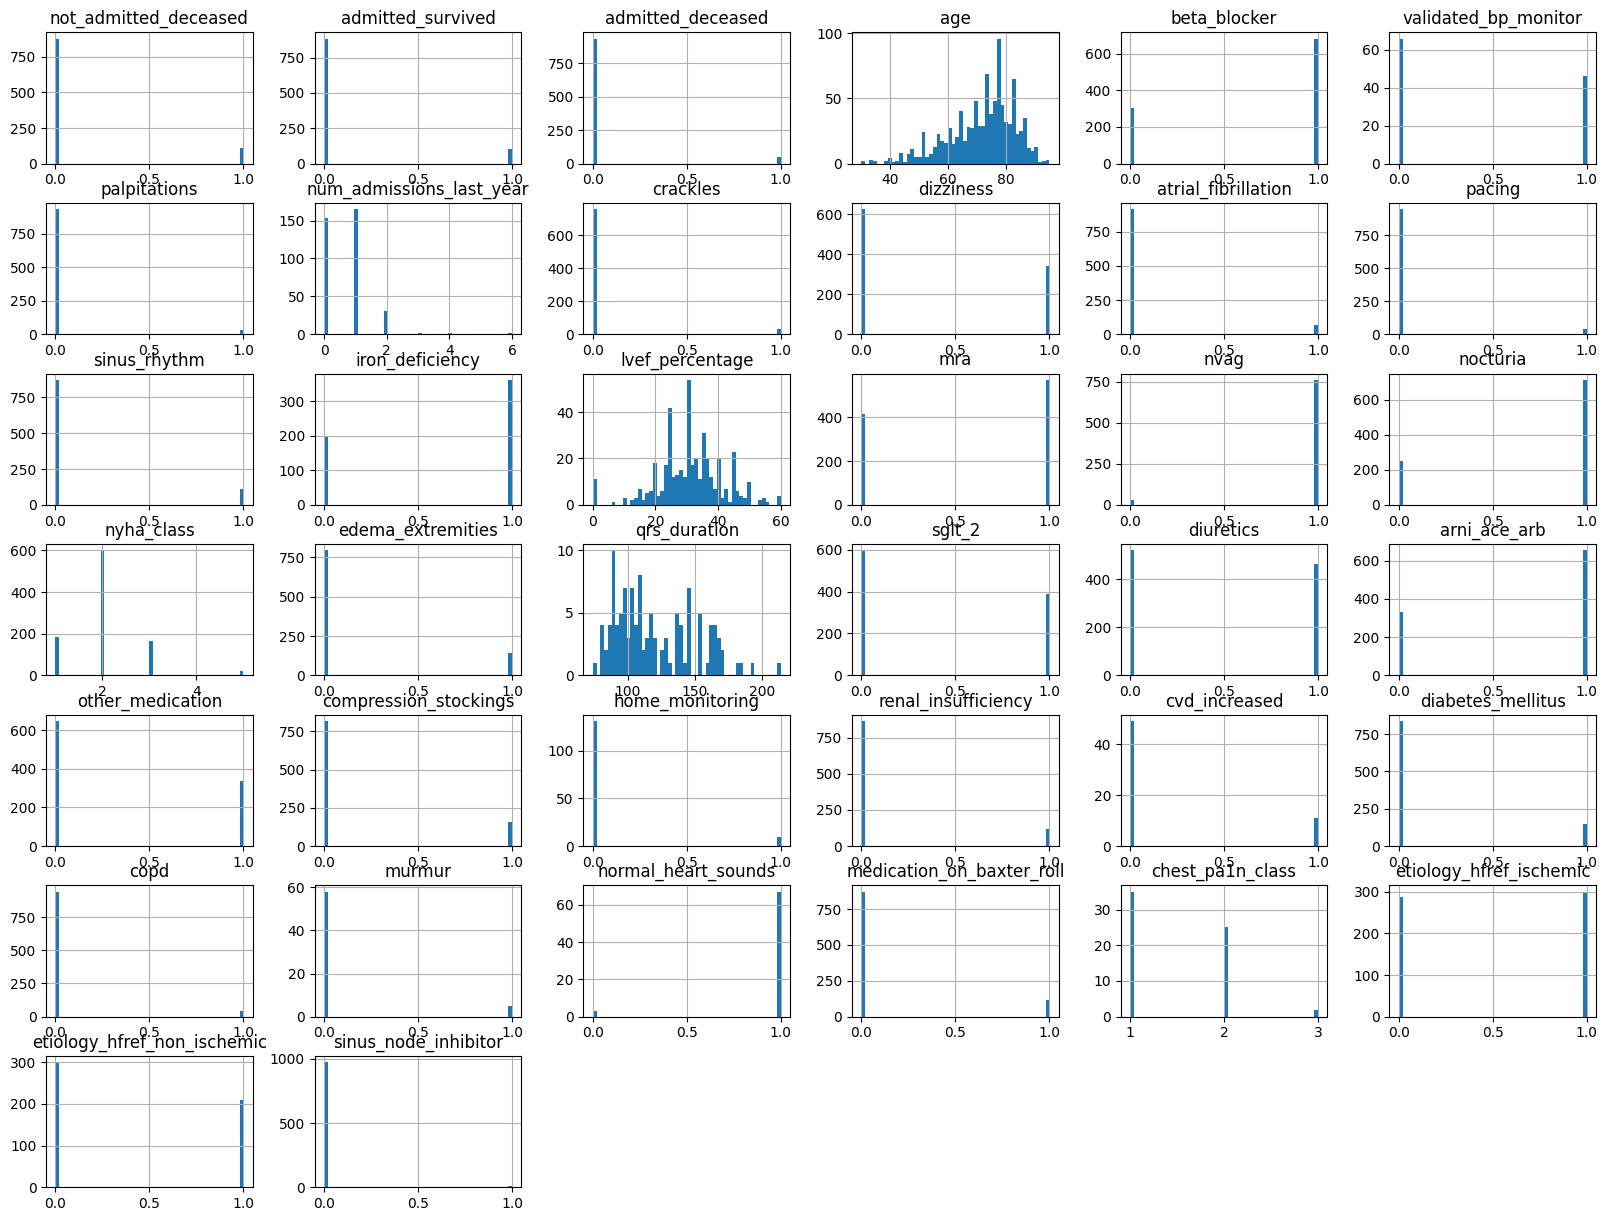

In [7]:
    # Plot distributions of numerical features
    df.hist(bins=50, figsize=(20, 15))
    plt.show()

In [8]:
# Step 2: Data Cleaning
def clean_data(df):
    df['vital_gegevens'] = df['vital_gegevens'].str.replace("(!)", "", case=False, regex=False)  # Remove "(!)"
    df['vital_gegevens'] = df['vital_gegevens'].str.replace(".", "", case=False, regex=False)     # Remove "."
    df['vital_gegevens'] = df['vital_gegevens'].str.strip()                                       # Strip leading/trailing spaces
    df['vital_gegevens'] = df['vital_gegevens'].str.lower()                                       # Convert to lowercase
    return df

In [9]:
# Clean the data
df = clean_data(df.copy())


In [10]:
print(df.isnull().sum())

not_admitted_deceased            0
admitted_survived                0
admitted_deceased                0
age                              0
gender                           0
beta_blocker                     0
hf_status                       22
visit_type                      39
patient_type                     1
treatment_phase                 45
validated_bp_monitor           873
palpitations                    16
num_admissions_last_year       632
hf_type                          9
crackles                       196
device                         156
dizziness                       17
atrial_fibrillation              0
pacing                           0
sinus_rhythm                     0
iron_deficiency                423
ferinject                      883
lab                             22
lbbb                           871
lvef                            15
lvef_percentage                547
mra                              0
nvag                           193
nocturia            

In [11]:
import pandas as pd
import miceforest as mf

# Example DataFrame (replace this with your actual df)
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Clean column names by removing special characters (if not already done)
df_encoded.columns = df_encoded.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

# Remove duplicated columns (if any)
df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]

# Check if there are any duplicated columns
print("Remaining columns:", df_encoded.columns)

# Now, apply MICE imputation
imp_data = mf.ImputationKernel(df_encoded)

# Perform the imputation with 1 imputation dataset
imp_data.mice(1)

# Retrieve the first completed dataset after imputation
imputed_df = imp_data.complete_data(0)

# Check the imputed data
print(imputed_df.head())



Remaining columns: Index(['not_admitted_deceased', 'admitted_survived', 'admitted_deceased',
       'age', 'beta_blocker', 'validated_bp_monitor', 'palpitations',
       'num_admissions_last_year', 'crackles', 'dizziness',
       ...
       'vital_gegevens_thuis_gemeten_136_71__pati_nt_meet_om_de_dag_de_bloeddruk_en_het_gewicht',
       'vital_gegevens_thuis_gemeten_hartslag_overdag_rond_de_65_70_sl_p_min_rr_systole_tussen_de_120_140__diastole_rond_de_70_75',
       'vital_gegevens_white_coat_hypertension___bloeddruk_134_74__polsfrequentie_68__stabiel_gewicht_101_kg',
       'vital_gegevens_wordt_gemeten_bij_revant__blijft_stabiel__systolisch_rond_de_100_110',
       'vital_gegevens_zelf_tensie_gemeten_voor_medicatie_inname_136_66_met_een_polsfrequentie_56',
       'vital_gegevens_zittend_bloeddruk_124_78__polsfrequentie_76__gewicht_57_5_kg__spo2_99_____staand_bloeddruk_115_70',
       'abdomen_zorgwekkend', 'etiology_hfpef_Onbekend',
       'etiology_hfpef_Overig', 'etiology_hfpef_Sec

In [12]:
print(df.isnull().sum())

not_admitted_deceased            0
admitted_survived                0
admitted_deceased                0
age                              0
gender                           0
beta_blocker                     0
hf_status                       22
visit_type                      39
patient_type                     1
treatment_phase                 45
validated_bp_monitor           873
palpitations                    16
num_admissions_last_year       632
hf_type                          9
crackles                       196
device                         156
dizziness                       17
atrial_fibrillation              0
pacing                           0
sinus_rhythm                     0
iron_deficiency                423
ferinject                      883
lab                             22
lbbb                           871
lvef                            15
lvef_percentage                547
mra                              0
nvag                           193
nocturia            

In [13]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Drop columns with more than 50% missing values
df_cleaned = df.loc[:, missing_percentage < 50]

# Check how many columns are left after dropping
print("Remaining columns after dropping:", df_cleaned.columns)


Remaining columns after dropping: Index(['not_admitted_deceased', 'admitted_survived', 'admitted_deceased',
       'age', 'gender', 'beta_blocker', 'hf_status', 'visit_type',
       'patient_type', 'treatment_phase', 'palpitations', 'hf_type',
       'crackles', 'device', 'dizziness', 'atrial_fibrillation', 'pacing',
       'sinus_rhythm', 'iron_deficiency', 'lab', 'lvef', 'mra', 'nvag',
       'nocturia', 'nyha_class', 'edema_extremities', 'accompanied_by',
       'sglt_2', 'vital_gegevens', 'diuretics', 'arni_ace_arb',
       'other_medication', 'compression_stockings', 'renal_insufficiency',
       'diabetes_mellitus', 'copd', 'medication_on_baxter_roll',
       'etiology_hfref_ischemic', 'etiology_hfref_non_ischemic',
       'sinus_node_inhibitor'],
      dtype='object')


In [14]:
import pandas as pd
import miceforest as mf

# Make sure the 'lab' column is in df_cleaned
# If 'lab' exists in df_cleaned, we should separate it before applying transformations.
lab_column = df_cleaned['lab'] if 'lab' in df_cleaned.columns else None

# Apply one-hot encoding to categorical features, excluding 'lab' column
df_encoded = pd.get_dummies(df_cleaned.drop(columns=['lab'], errors='ignore'), drop_first=True)

# Clean column names by removing special characters (if not already done)
df_encoded.columns = df_encoded.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

# Remove duplicated columns (if any)
df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]

# Initialize the Imputation Kernel
imp_data = mf.ImputationKernel(df_encoded)

# Perform the imputation with 1 imputation dataset
imp_data.mice(1)

# Retrieve the first completed dataset after imputation
imputed_df = imp_data.complete_data(0)

# If 'lab' was present, add it back to the imputed DataFrame
if lab_column is not None:
    imputed_df['lab'] = lab_column

# Check the imputed data
print(imputed_df.head())



   not_admitted_deceased  admitted_survived  admitted_deceased   age  \
0                      0                  0                  0  65.0   
1                      0                  0                  0  79.0   
2                      0                  0                  0  63.0   
3                      0                  0                  0  79.0   
4                      0                  0                  0  74.0   

   beta_blocker  palpitations  crackles  dizziness  atrial_fibrillation  \
0             1           0.0       0.0        0.0                    0   
1             1           0.0       0.0        1.0                    0   
2             1           0.0       0.0        1.0                    0   
3             0           0.0       0.0        0.0                    0   
4             1           0.0       0.0        0.0                    0   

   pacing  ...  \
0       0  ...   
1       0  ...   
2       0  ...   
3       0  ...   
4       0  ...   

   vita

General Observations
Dataset Size:

985 rows and 53 columns, which is relatively large and contains a mix of numerical and categorical data.
Data Types:

22 numerical columns (float64), 16 integer columns (int64), and 15 categorical columns (object).
Target Labels:

not_admitted_deceased, admitted_survived, and admitted_deceased are likely candidate target columns as they are binary (0/1) and describe patient outcomes.
Missing Data:

Many columns have significant missing values, such as validated_bp_monitor (112/985), num_admissions_last_year (353/985), and etiology_hfpef (22/985). These will require careful handling.
Imbalance:

Columns like not_admitted_deceased, admitted_survived, and admitted_deceased are highly imbalanced, as their means are significantly less than 0.5.
Recommendations for Next Steps
Target Selection:

Decide on the primary target variable(s) based on the  analysis goal (e.g.,we are predicting mortality or admission outcomes).

In [15]:
imputed_df.columns


Index(['not_admitted_deceased', 'admitted_survived', 'admitted_deceased',
       'age', 'beta_blocker', 'palpitations', 'crackles', 'dizziness',
       'atrial_fibrillation', 'pacing',
       ...
       'vital_gegevens_tensies_thuis_94_61__97_61__92_60_mmhg__bloeddruk_114_70__polsfrequentie_62__stabiel_gewicht_67_kg',
       'vital_gegevens_thuis_bloeddruk_140_150_55_70_mmhg___bloeddruk_173_66__polsfrequentie_72__gewicht_64_3_kg______3kg_bij_verminderde_intake',
       'vital_gegevens_thuis_gemeten__gemiddelde_tensie_123_88__in_de_avond_soms_wat_lager_90_66',
       'vital_gegevens_thuis_gemeten_136_71__pati_nt_meet_om_de_dag_de_bloeddruk_en_het_gewicht',
       'vital_gegevens_thuis_gemeten_hartslag_overdag_rond_de_65_70_sl_p_min_rr_systole_tussen_de_120_140__diastole_rond_de_70_75',
       'vital_gegevens_white_coat_hypertension___bloeddruk_134_74__polsfrequentie_68__stabiel_gewicht_101_kg',
       'vital_gegevens_wordt_gemeten_bij_revant__blijft_stabiel__systolisch_rond_de_100_110',

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Check if 'lab' is in the dataframe before proceeding
if 'lab' in imputed_df.columns:
    # Handle "lab" column
    # If "lab" contains categorical data, let's encode it using OneHotEncoder or LabelEncoder
    # Check if it is categorical or numerical:
    if imputed_df['lab'].dtype == 'object':
        # If it's categorical, apply one-hot encoding
        lab_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        lab_encoded = lab_encoder.fit_transform(imputed_df[['lab']])
        lab_encoded_df = pd.DataFrame(lab_encoded, columns=lab_encoder.get_feature_names_out(['lab']))
        imputed_df = pd.concat([imputed_df, lab_encoded_df], axis=1)
        imputed_df = imputed_df.drop(['lab'], axis=1)
    else:
        # If it's numerical, apply standard scaling or normalization
        scaler = StandardScaler()
        imputed_df['lab'] = scaler.fit_transform(imputed_df[['lab']])

# Feature Engineering for "vital_gegevens"
# Assuming 'vital_gegevens' contains structured strings like: 'bloeddruk_140/90', 'gewicht_70kg', etc.
if 'vital_gegevens' in imputed_df.columns:
    vital_cols = ['blood_pressure_systolic', 'blood_pressure_diastolic', 'heart_rate', 'weight']

    # Initialize empty columns for vital signs
    for col in vital_cols:
        imputed_df[col] = np.nan

    # Extract relevant information from "vital_gegevens"
    for idx, row in imputed_df.iterrows():
        if 'bloeddruk' in str(row['vital_gegevens']):
            bp_values = str(row['vital_gegevens']).split('bloeddruk_')[-1].split('_')[0].split('/')
            if len(bp_values) == 2:
                imputed_df.at[idx, 'blood_pressure_systolic'] = float(bp_values[0])
                imputed_df.at[idx, 'blood_pressure_diastolic'] = float(bp_values[1])

        if 'gewicht' in str(row['vital_gegevens']):
            weight_value = str(row['vital_gegevens']).split('gewicht_')[-1].split('kg')[0]
            if weight_value:
                imputed_df.at[idx, 'weight'] = float(weight_value)

        if 'polsfrequentie' in str(row['vital_gegevens']):
            pulse_value = str(row['vital_gegevens']).split('polsfrequentie_')[-1].split('__')[0]
            if pulse_value:
                imputed_df.at[idx, 'heart_rate'] = float(pulse_value)

    # Drop original "vital_gegevens" column as we've extracted useful features
    imputed_df = imputed_df.drop(['vital_gegevens'], axis=1)

# After feature engineering, let's re-check the data
print(imputed_df.head())


   not_admitted_deceased  admitted_survived  admitted_deceased   age  \
0                      0                  0                  0  65.0   
1                      0                  0                  0  79.0   
2                      0                  0                  0  63.0   
3                      0                  0                  0  79.0   
4                      0                  0                  0  74.0   

   beta_blocker  palpitations  crackles  dizziness  atrial_fibrillation  \
0             1           0.0       0.0        0.0                    0   
1             1           0.0       0.0        1.0                    0   
2             1           0.0       0.0        1.0                    0   
3             0           0.0       0.0        0.0                    0   
4             1           0.0       0.0        0.0                    0   

   pacing  ...  \
0       0  ...   
1       0  ...   
2       0  ...   
3       0  ...   
4       0  ...   

   lab_

In [17]:
# Check for missing values
print(imputed_df.isnull().sum())



not_admitted_deceased                                                                                                        0
admitted_survived                                                                                                            0
admitted_deceased                                                                                                            0
age                                                                                                                          0
beta_blocker                                                                                                                 0
                                                                                                                            ..
lab_Via huisarts 5-12-2022 (zie verwijs brief)  kreatinine 119 umol/L   eGFR (CKD-EPI) 50 ml/min/  hemoglobine 7,4 mmol/L    0
lab_Volgt volgende week                                                                                        

In [18]:
imputed_df.head()

,not_admitted_deceased,admitted_survived,admitted_deceased,age,beta_blocker,palpitations,crackles,dizziness,atrial_fibrillation,pacing,...,"lab_Lad 8 juni'23 via huisarts Hb 9.5 Na 141, K 4,8, Ca 2,34, Alb 35, fosfaat 1,16, PTH 7 Kreat 143, eGFR 38 HBa1c 55, gluc 7,5","lab_Telefonisch opgevraagd bij ETZ 2-1-2023 Hb 10,3, Natrium 141, Kalium 4,6, Kreatinine 79, Ureum 8,1, eGFR >90, NT-PROBNP 76.",lab_Uitslag telefonisch via huisarts,"lab_Via SHL 3-7-2023 Natrium 142, Kalium 4,6, Kreatinine 90, eGFR 49, glucose 4,7","lab_Via huisarts 10-2-2023 Natrium 142, Kalium 4,6, Kreatinine 80, eGFR 65, Hb 9,0","lab_Via huisarts 5-12-2022 (zie verwijs brief) kreatinine 119 umol/L eGFR (CKD-EPI) 50 ml/min/ hemoglobine 7,4 mmol/L",lab_Volgt volgende week,"lab_Zie iview NtproBNP in pmol/ml, alhier pmol/L Ureum 12 Kreatinine 152, eGFR 35 kalium 4,1.",lab_Zie webviewer lab via huisarts,lab_nan
0,0,0,0,65.0,1,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,79.0,1,0.0,0.0,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,63.0,1,0.0,0.0,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,79.0,0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,74.0,1,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Check the first few rows of the original dataset
print(df.head())

# Check the first few rows of the imputed dataset
print(imputed_df.head())



   not_admitted_deceased  admitted_survived  admitted_deceased   age gender  \
0                      0                  0                  0  65.0    Man   
1                      0                  0                  0  79.0    Man   
2                      0                  0                  0  63.0    Man   
3                      0                  0                  0  79.0    Man   
4                      0                  0                  0  74.0    Man   

   beta_blocker          hf_status   visit_type      patient_type  \
0             1  Stabiel hartfalen  polikliniek  controle patiënt   
1             1  Stabiel hartfalen  polikliniek  controle patiënt   
2             1  Stabiel hartfalen  polikliniek  controle patiënt   
3             0  Stabiel hartfalen  polikliniek  controle patiënt   
4             1  Stabiel hartfalen  polikliniek  controle patiënt   

  treatment_phase  ...  diabetes_mellitus  copd  murmur normal_heart_sounds  \
0  optitratiefase  ...         

In [20]:
# Separate features and targets
target_columns = ['admitted_survived', 'admitted_deceased', 'not_admitted_deceased']
X = imputed_df.drop(columns=target_columns)
y = imputed_df[target_columns]

In [21]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)


In [25]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# Define target columns
target_columns = ['admitted_survived', 'admitted_deceased', 'not_admitted_deceased']

# Process numerical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Iterate through each target column
for target in target_columns:
    print(f"Processing target: {target}")

    # Split the data into training and test sets (80% for training, 20% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y[target], test_size=0.2, random_state=42)

    # Apply SMOTE to training data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Train the Random Forest model on the oversampled data
    best_rf = RandomForestClassifier(random_state=42)
    best_rf.fit(X_train_smote, y_train_smote)

    # Predict on test data
    y_pred_test = best_rf.predict(X_test)

    # Evaluate the model using F1 score
    f1_test = f1_score(y_test, y_pred_test)

    print(f"F1 Score on Test Data for {target}: {f1_test:.4f}")



Processing target: admitted_survived
F1 Score on Test Data for admitted_survived: 0.0000
Processing target: admitted_deceased
F1 Score on Test Data for admitted_deceased: 0.0000
Processing target: not_admitted_deceased
F1 Score on Test Data for not_admitted_deceased: 0.0000


In [26]:
for target in target_columns:
    print(f"Class distribution for {target}:")
    print(y[target].value_counts())


Class distribution for admitted_survived:
admitted_survived
0    885
1    100
Name: count, dtype: int64
Class distribution for admitted_deceased:
admitted_deceased
0    933
1     52
Name: count, dtype: int64
Class distribution for not_admitted_deceased:
not_admitted_deceased
0    879
1    106
Name: count, dtype: int64


The class distributions indicate significant class imbalance in all three targets, with the majority class dominating over the minority class. This imbalance can lead to models that predict only the majority class, resulting in poor F1 scores for the minority class.

Resampling for Imbalanced Classes (SMOTE and SMOTE-ENN)
Apply SMOTE and SMOTE-ENN to handle class imbalance. You can resample for each target column separately.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Resample for each target using SMOTE and SMOTE-ENN
smote = SMOTE(random_state=42)
smoteenn = SMOTEENN(random_state=42)

# For each target column, apply resampling
X_resampled_dict = {}
y_resampled_dict = {}

for target in target_columns:
    X_resampled, y_resampled = smote.fit_resample(X_encoded, y[target])
    X_resampled_dict[f"{target}_smote"] = X_resampled
    y_resampled_dict[f"{target}_smote"] = y_resampled

    X_resampled_enn, y_resampled_enn = smoteenn.fit_resample(X_encoded, y[target])
    X_resampled_dict[f"{target}_smoteenn"] = X_resampled_enn
    y_resampled_dict[f"{target}_smoteenn"] = y_resampled_enn


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Initialize classifiers
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
mlp = MLPClassifier(random_state=42)

# Store F1 scores for comparison
f1_scores = {}

# Train and evaluate models for each target column
for target in target_columns:
    # Original Data
    rf.fit(X_encoded, y[target])
    svm.fit(X_encoded, y[target])
    mlp.fit(X_encoded, y[target])

    y_pred_rf = rf.predict(X_encoded)
    y_pred_svm = svm.predict(X_encoded)
    y_pred_mlp = mlp.predict(X_encoded)

    f1_scores[f"{target}_original_rf"] = f1_score(y[target], y_pred_rf)
    f1_scores[f"{target}_original_svm"] = f1_score(y[target], y_pred_svm)
    f1_scores[f"{target}_original_mlp"] = f1_score(y[target], y_pred_mlp)

    # Weighted Classes
    rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
    svm_weighted = SVC(class_weight='balanced', random_state=42)
    mlp_weighted = MLPClassifier(random_state=42)

    rf_weighted.fit(X_encoded, y[target])
    svm_weighted.fit(X_encoded, y[target])
    mlp_weighted.fit(X_encoded, y[target])

    y_pred_rf_weighted = rf_weighted.predict(X_encoded)
    y_pred_svm_weighted = svm_weighted.predict(X_encoded)
    y_pred_mlp_weighted = mlp_weighted.predict(X_encoded)

    f1_scores[f"{target}_weighted_rf"] = f1_score(y[target], y_pred_rf_weighted)
    f1_scores[f"{target}_weighted_svm"] = f1_score(y[target], y_pred_svm_weighted)
    f1_scores[f"{target}_weighted_mlp"] = f1_score(y[target], y_pred_mlp_weighted)

    # SMOTE
    rf_smote = RandomForestClassifier(random_state=42)
    svm_smote = SVC(random_state=42)
    mlp_smote = MLPClassifier(random_state=42)

    rf_smote.fit(X_resampled_dict[f"{target}_smote"], y_resampled_dict[f"{target}_smote"])
    svm_smote.fit(X_resampled_dict[f"{target}_smote"], y_resampled_dict[f"{target}_smote"])
    mlp_smote.fit(X_resampled_dict[f"{target}_smote"], y_resampled_dict[f"{target}_smote"])

    y_pred_rf_smote = rf_smote.predict(X_resampled_dict[f"{target}_smote"])
    y_pred_svm_smote = svm_smote.predict(X_resampled_dict[f"{target}_smote"])
    y_pred_mlp_smote = mlp_smote.predict(X_resampled_dict[f"{target}_smote"])

    f1_scores[f"{target}_smote_rf"] = f1_score(y_resampled_dict[f"{target}_smote"], y_pred_rf_smote)
    f1_scores[f"{target}_smote_svm"] = f1_score(y_resampled_dict[f"{target}_smote"], y_pred_svm_smote)
    f1_scores[f"{target}_smote_mlp"] = f1_score(y_resampled_dict[f"{target}_smote"], y_pred_mlp_smote)

    # SMOTE-ENN
    rf_smoteenn = RandomForestClassifier(random_state=42)
    svm_smoteenn = SVC(random_state=42)
    mlp_smoteenn = MLPClassifier(random_state=42)

    rf_smoteenn.fit(X_resampled_dict[f"{target}_smoteenn"], y_resampled_dict[f"{target}_smoteenn"])
    svm_smoteenn.fit(X_resampled_dict[f"{target}_smoteenn"], y_resampled_dict[f"{target}_smoteenn"])
    mlp_smoteenn.fit(X_resampled_dict[f"{target}_smoteenn"], y_resampled_dict[f"{target}_smoteenn"])

    y_pred_rf_smoteenn = rf_smoteenn.predict(X_resampled_dict[f"{target}_smoteenn"])
    y_pred_svm_smoteenn = svm_smoteenn.predict(X_resampled_dict[f"{target}_smoteenn"])
    y_pred_mlp_smoteenn = mlp_smoteenn.predict(X_resampled_dict[f"{target}_smoteenn"])

    f1_scores[f"{target}_smoteenn_rf"] = f1_score(y_resampled_dict[f"{target}_smoteenn"], y_pred_rf_smoteenn)
    f1_scores[f"{target}_smoteenn_svm"] = f1_score(y_resampled_dict[f"{target}_smoteenn"], y_pred_svm_smoteenn)
    f1_scores[f"{target}_smoteenn_mlp"] = f1_score(y_resampled_dict[f"{target}_smoteenn"], y_pred_mlp_smoteenn)

# Print the F1 scores for comparison
for key, value in f1_scores.items():
    print(f"{key}: {value}")


admitted_survived_original_rf: 1.0
admitted_survived_original_svm: 0.6013986013986014
admitted_survived_original_mlp: 1.0
admitted_survived_weighted_rf: 1.0
admitted_survived_weighted_svm: 0.8849557522123894
admitted_survived_weighted_mlp: 1.0
admitted_survived_smote_rf: 1.0
admitted_survived_smote_svm: 0.9882747068676717
admitted_survived_smote_mlp: 1.0
admitted_survived_smoteenn_rf: 1.0
admitted_survived_smoteenn_svm: 0.998298355076574
admitted_survived_smoteenn_mlp: 1.0
admitted_deceased_original_rf: 1.0
admitted_deceased_original_svm: 0.17543859649122806
admitted_deceased_original_mlp: 1.0
admitted_deceased_weighted_rf: 1.0
admitted_deceased_weighted_svm: 0.7938931297709924
admitted_deceased_weighted_mlp: 1.0
admitted_deceased_smote_rf: 1.0
admitted_deceased_smote_svm: 0.9878242456326098
admitted_deceased_smote_mlp: 1.0
admitted_deceased_smoteenn_rf: 1.0
admitted_deceased_smoteenn_svm: 0.9978609625668449
admitted_deceased_smoteenn_mlp: 1.0
not_admitted_deceased_original_rf: 1.0
not

Testing with the Best Model
Once you identify the best model (based on F1 score) for each target, you can apply the model on your test data in a similar manner

In [ ]:
# Evaluate performance on training data
y_pred_train = best_rf.predict(X_train_smote)
f1_train = f1_score(y_train_smote, y_pred_train)
print(f"F1 Score on Training Data: {f1_train:.4f}")


F1 Score on Training Data: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X_train_smote, y_train_smote, cv=5, scoring='f1')
print(f"Cross-validation F1 scores: {cv_scores}")
print(f"Average cross-validation F1 score: {cv_scores.mean()}")


Cross-validation F1 scores: [0.58163265 1.         0.99644128 1.         0.99641577]
Average cross-validation F1 score: 0.9148979409618667


In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42)),
    ('mlp', MLPClassifier(random_state=42))
], voting='hard')

voting_clf.fit(X_train_smote, y_train_smote)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('mlp', MLPClassifier(random_state=42))])

In [ ]:
from sklearn.metrics import f1_score

# Predict on the training set
y_train_pred = voting_clf.predict(X_train_smote)

# Calculate the F1 score
f1_train = f1_score(y_train_smote, y_train_pred, average='weighted')  # Use 'macro' or 'micro' depending on your need
print(f"F1 Score on Training Data: {f1_train}")


F1 Score on Training Data: 1.0


In [ ]:
# Predict on the test set (assuming you have X_test and y_test)
y_test_pred = voting_clf.predict(X_test)

# Calculate the F1 score on the test set
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print(f"F1 Score on Test Data: {f1_test}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


F1 Score on Test Data: 0.8840497154755262


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings related to feature names
warnings.filterwarnings('ignore', category=UserWarning)
# Predict on the test set (assuming you have X_test and y_test)
y_test_pred = voting_clf.predict(X_test)

# Calculate the F1 score on the test set
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print(f"F1 Score on Test Data: {f1_test}")



F1 Score on Test Data: 0.8840497154755262


In [ ]:
# Ensure that you're using the same feature names for both training and prediction
voting_clf.fit(X_train_smote, y_train_smote)

# Predict on the test set using the same format
y_test_pred = voting_clf.predict(X_test)
